# <p align="center"> ANÁLISIS EXPLORATORIO DE DATOS (EDA) </p>

In [46]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Ingesta de datos
df_facts = pd.read_excel('../Dataset/homicidios.xlsx', sheet_name='HECHOS')
df_victims = pd.read_excel('../Dataset/homicidios.xlsx', sheet_name='VICTIMAS')

## <p align="center">Análisis preliminar <p>

### **En base a una comprensión exhaustiva del diccionario del conjunto de datos proporcionado, podemos concluir que tenemos ciertas columnas redundantes o irrelevantes para el desarrollo del análisis, por lo que vamos a proceder a eliminarlas para facilitar y simplificar un poco este proceso de EDA. También haremos algunas transformaciones en este proceso.**

In [48]:
df_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [49]:
df_victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


#### Hoja de hechos

In [50]:
# Estas 3 columnas pueden derivarse de la columna 'fecha'.
df_facts.drop(columns=['AAAA','MM','DD'], inplace=True)

# Estas 3 columnas se combinan en la columna 'lugar_del_hecho'
df_facts.drop(columns=['Calle','Altura','Cruce'], inplace=True)

In [51]:
# La columna 'direccion_normalizada' es redundante con 'lugar_del_hecho', además de poseer muchos valores nulos.
df_facts.drop(columns=['Dirección Normalizada'], inplace=True)

In [52]:
# No vamos a utilizar la columna 'XY (CABA)' ya que tenemos las columnas 'x' e 'y' que utilizan el formato WGS84 que es más común e ideal para trabajar con coordenadas.
df_facts.drop(columns=['XY (CABA)'], inplace=True)

In [53]:
# En el caso de la columna 'participantes', vamos a eliminarla ya que es preferible trabajar con estos datos por separado ('victima' y 'acusado')
df_facts.drop(columns=['PARTICIPANTES'], inplace=True)

In [54]:
df_facts.head(1)

,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO


In [55]:
# Normalizamos los nombres de las columnas
new_column_names = {
    'ID': 'id',
    'N_VICTIMAS': 'nro_victimas',
    'FECHA': 'fecha',
    'HORA': 'hora',
    'HH': 'hh',
    'LUGAR_DEL_HECHO': 'lugar_del_hecho',
    'Dirección Normalizada': 'direccion_normalizada',
    'TIPO_DE_CALLE': 'tipo_de_calle',
    'COMUNA': 'comuna',
    'pos x': 'x',
    'pos y': 'y',
    'VICTIMA': 'victima',
    'ACUSADO': 'acusado'
}

df_facts.rename(columns=new_column_names, inplace=True)

In [11]:
df_facts.head(1)

,id,nro_victimas,fecha,hora,hh,lugar_del_hecho,tipo_de_calle,comuna,x,y,victima,acusado
0,2016-0001,1,2016-01-01,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO


In [12]:
df_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               696 non-null    object        
 1   nro_victimas     696 non-null    int64         
 2   fecha            696 non-null    datetime64[ns]
 3   hora             696 non-null    object        
 4   hh               696 non-null    object        
 5   lugar_del_hecho  696 non-null    object        
 6   tipo_de_calle    696 non-null    object        
 7   comuna           696 non-null    int64         
 8   x                696 non-null    object        
 9   y                696 non-null    object        
 10  victima          696 non-null    object        
 11  acusado          696 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 65.4+ KB


In [13]:
# Convertimos la columna HH a tipo 'Int64' para el manejo de datos faltantes.
df_facts['hh'] = pd.to_datetime(df_facts['hh'], format='%H', errors='coerce')
df_facts['hh'] = df_facts['hh'].dt.hour.astype('Int64')

In [14]:
df_facts['hh'].unique()

<IntegerArray>
[   4,    1,    7,    0,    5,   18,   19,   15,   11,   22,   16,    9,   23,
    6,   10,   17,   12,    8,   20,   21,   14,    3,    2,   13, <NA>]
Length: 25, dtype: Int64

In [15]:
# Transformamos la columna 'fecha' a tipo datetime.
df_facts['fecha'] = pd.to_datetime(df_facts['fecha'])

In [16]:
# Convertimos las columnas 'x' e 'y' a tipo float, manejando errores como NaN.
df_facts['x'] = pd.to_numeric(df_facts['x'], errors='coerce')
df_facts['y'] = pd.to_numeric(df_facts['y'], errors='coerce')

In [17]:
print(df_facts['x'].isna().sum())
print(df_facts['y'].isna().sum())

12
12


Dejaremos estos valores nulos sin imputar ni eliminar por el momento y veremos más adelante si es necesario tomar alguna decisión.

#### Hoja de víctimas

In [18]:
# Estas 3 columnas se derivan de 'fecha'
df_victims.drop(columns=['AAAA','MM','DD'], inplace=True)

In [19]:
df_victims.head(1)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


In [20]:
# Normalizamos los nombres de las columnas

new_column_names = {
    'ID_hecho': 'id_hecho',
    'FECHA': 'fecha',
    'ROL': 'rol',
    'VICTIMA': 'victima',
    'SEXO': 'sexo',
    'EDAD': 'edad',
    'FECHA_FALLECIMIENTO': 'fecha_fallecimiento'
    }

df_victims.rename(columns=new_column_names, inplace=True)

In [21]:
df_victims.head(1)

,id_hecho,fecha,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


In [22]:
df_victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_hecho             717 non-null    object        
 1   fecha                717 non-null    datetime64[ns]
 2   rol                  717 non-null    object        
 3   victima              717 non-null    object        
 4   sexo                 717 non-null    object        
 5   edad                 717 non-null    object        
 6   fecha_fallecimiento  717 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 39.3+ KB


In [23]:
df_victims['fecha_fallecimiento'].value_counts()

fecha_fallecimiento
SD                     68
2017-02-26 00:00:00     3
2017-01-16 00:00:00     3
2020-12-25 00:00:00     3
2019-12-18 00:00:00     3
                       ..
2018-01-19 00:00:00     1
2018-01-18 00:00:00     1
2018-01-14 00:00:00     1
2018-01-12 00:00:00     1
2022-01-02 00:00:00     1
Name: count, Length: 563, dtype: int64

In [24]:
# Transformamos la columna 'fecha_fallecimiento' a tipo datetime.
df_victims['fecha_fallecimiento'] = pd.to_datetime(df_victims['fecha_fallecimiento'], errors='coerce')

# Contamos la cantidad de valores nulos que quedaron.
df_victims['fecha_fallecimiento'].isna().sum()

68

In [25]:
# Transformamos la columna edad a tipo int manejo de errores como NaN.
df_victims['edad'] = pd.to_numeric(df_victims['edad'], errors='coerce')

In [26]:
# Contamos la cantidad de valores nulos que quedaron.
df_victims['edad'].isna().sum()

53

Estos valores nulos también veremos cómo manejarlos más adelante si resulta necesario.

#### Chequeo de duplicados

In [27]:
# Revisamos si hay valores repetidos en las filas de los dataset.
df_facts.duplicated().sum()

0

In [28]:
df_victims.duplicated().sum()

0

In [29]:
# Revisamos si hay valores repetidos en la columna 'id' de los dataset.
df_facts['id'].duplicated().sum()

0

In [30]:
df_victims['id_hecho'].duplicated().sum()

21

En este caso es normal ya que puede haber más de una víctima por hecho.

## <p align=center>Análisis descriptivo<p>

**Tenemos dos KPIs ya establecidos:**

**- Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.**

**- Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.**

**Parte de este análisis descriptivo consiste en buscar un tercer KPI para desarrollar.**

#### Estadísticas descriptivas

In [31]:
df_facts.describe()

,nro_victimas,fecha,hh,comuna,x,y
count,696.000000,696,695.0,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,11.657554,7.425287,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,0.0,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,6.0,4.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,11.0,8.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,17.5,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,23.0,15.000000,-58.356082,-34.534654
std,0.179393,NaN,6.70009,4.387050,0.046144,0.035289


Estas estadísticas indican que la enorme mayoría de los accidentes tienen sólo una víctima, mientras que el número máximo de víctimas en un accidente fue de 3 personas.

Las fechas de los accidentes van desde el 01/01/2016 hasta el 30/12/2021 y parece que no se concentran en ningún año en particular.

Las coordenadas no parecen presentar outliers.

In [32]:
df_victims.describe()

,fecha,edad,fecha_fallecimiento
count,717,664.000000,649
mean,2018-09-09 01:36:24.100418304,42.167169,2018-11-23 15:27:27.457627136
min,2016-01-01 00:00:00,1.000000,2016-01-01 00:00:00
25%,2017-04-01 00:00:00,27.000000,2017-07-27 00:00:00
50%,2018-07-07 00:00:00,37.000000,2018-09-21 00:00:00
75%,2019-12-18 00:00:00,56.250000,2020-03-05 00:00:00
max,2021-12-30 00:00:00,95.000000,2022-01-03 00:00:00
std,NaN,19.788034,NaN


En el caso de la hoja de víctimas, ratifica los datos de hechos.

La edad de las víctimas necesita de un análisis mucho más detallado para llegar a alguna conclusión, pero no se ven grandes inconsistencias en los datos a simple vista.

La fecha de fallecimiento también parece no tener outliers, sin embargo hay varias víctimas que no tienen este registro.

#### Visualizaciones de distribución

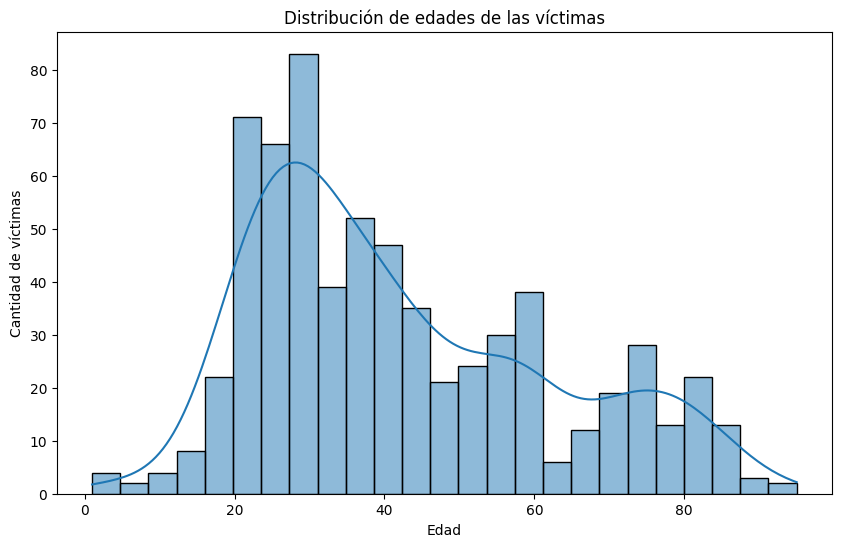

In [33]:
# Histograma de las edades de las víctimas
plt.figure(figsize=(10,6))
sns.histplot(df_victims['edad'], bins=25, kde=True)
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Cantidad de víctimas')
plt.show()

Este histograma indica que los jóvenes de entre 20 y 30 años son el grupo con más concentración de víctimas de accidentes.
Podemos empezar a pensar en campañas de concientización específicas para este grupo etario que parece ser el más afectado. 

Respecto al bajo número de víctimas en bebes y niños (incluso hasta 15 años) podemos asociarlo a menores tasas de exposición, y a las medidas de seguridad y cuidado que se utilizan en un contexto de transporte para los mismos. Podemos hacer énfasis en la importancia de ésto para seguir reduciendo el número.

En el caso de los adultos mayores, la curva nos indica un pico menor en mayores de 65 años, lo cual podría indicar una vulnerabilidad de este grupo específico. 

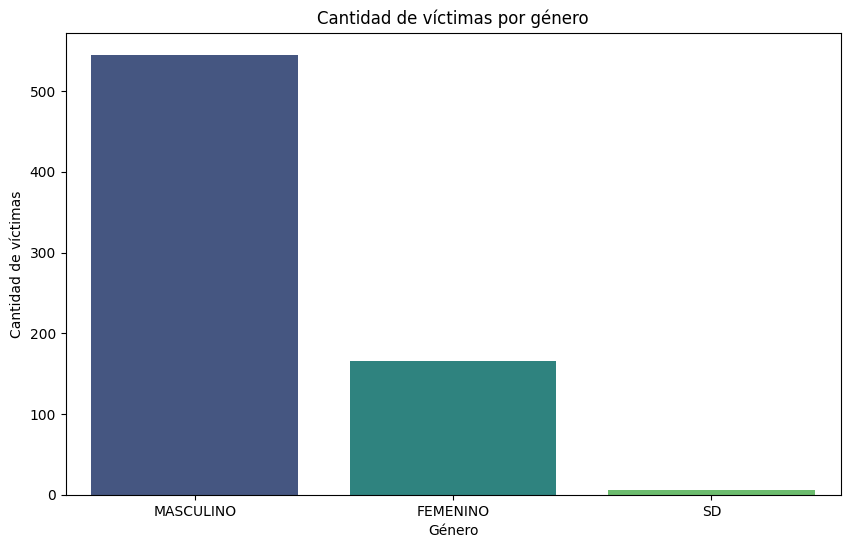

In [34]:
# Conteo de accidentes por género
plt.figure(figsize=(10,6))
sns.countplot(data=df_victims, x='sexo', palette='viridis')
plt.title('Cantidad de víctimas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de víctimas')
plt.show()

Este conteo nos indica que la mayoría de víctimas pertenecen al género masculino. Se podría decir que esto es debido al alto número de hombres conduciendo, ya que, en general, para trabajos de transporte y movilizacion particular, este género es el más ocupado. 

Otro factor a asociar son los comportamientos de riesgo que el hombre adopta a la hora de conducir a diferencia de las mujeres que son más prudentes en general.

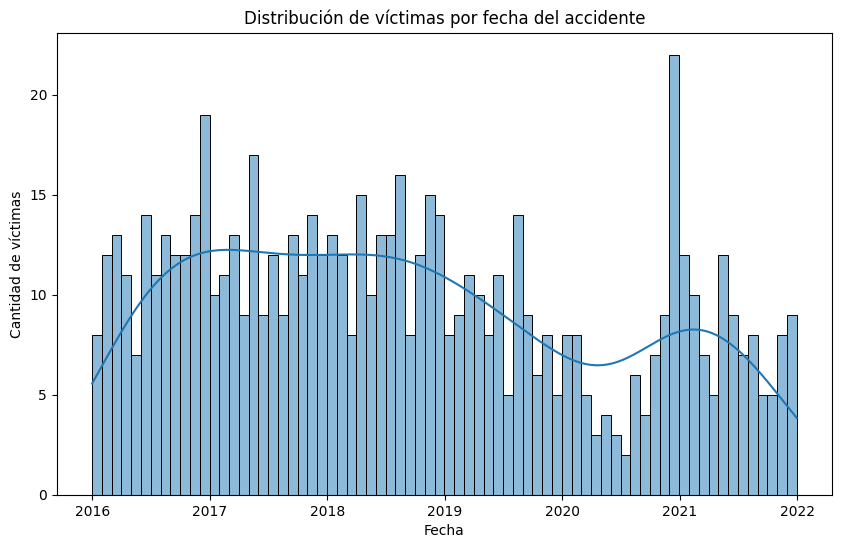

In [35]:
# Histograma de víctimas por fecha del accidente.
plt.figure(figsize=(10,6))
sns.histplot(df_victims['fecha'], bins=72, kde=True)
plt.title('Distribución de víctimas por fecha del accidente')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de víctimas')
plt.show()

Podemos observar una tendencia mayor a accidentes en las fechas festivas (fines y principios de cada año), lo cual es muy común debido al consumo de alcohol y alto volumen de tráfico. 
Se observa este patrón con más claridad al pasar por el año 2020 donde, debido a la pandemia y sus restricciones, la circulación de vehículos bajó drasticamente y por lo tanto los accidentes. Sin embargo a fin de año este número se multiplica y un factor importante es el que mencionamos anteriormente (consumo de alcohol y mayor tráfico). El encierro colectivo también fue un factor importante para esa fecha en particular.

## <p align=center>Visualización y Exploración de los datos</p>

**Luego de este análisis descriptivo y varios posibles KPIs, las métricas que nos interesan y vamos a seguir profundizando para su posterior desarrollo son:**
- Accidentes fatales en los últimos y primeros meses del año.
- Accidentes fatales en jóvenes de entre 20 y 30 años.
- Accidentes fatales en hombres.

Vamos a ir dividiendo este proceso en etapas, orientado principalmente a las variables, y al igual que en el principio, iremos descubriendo y tratando outliers y nulos sobre la marcha.

### <p align=center> Análisis univariado</p>

#### Variables temporales

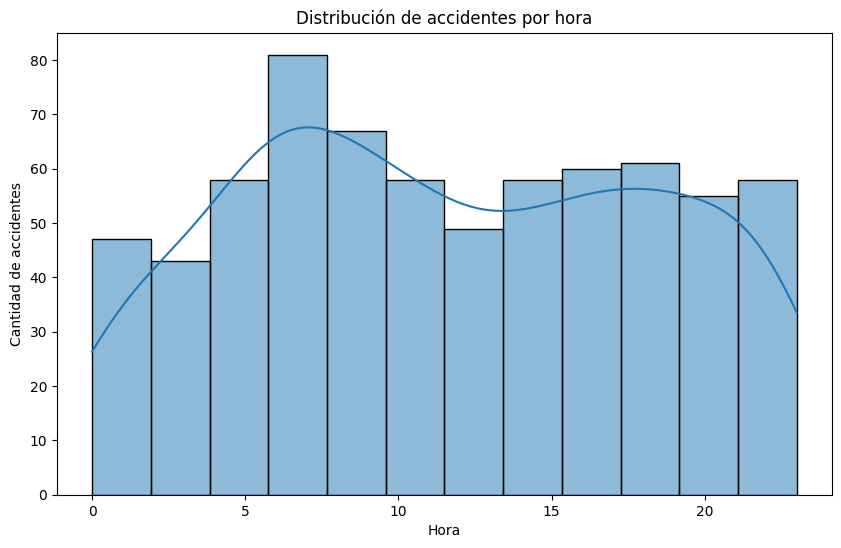

In [449]:
# Histograma de accidentes por hora
plt.figure(figsize=(10,6))
sns.histplot(df_facts['hh'], bins=12, kde=True)
plt.title('Distribución de accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de accidentes')
plt.show()

Este histograma de accidentes por hora nos muestra un pico entre las 6 y 8 AM. Hay muchos factores que pueden influir en esto: el principal es el volumen del tráfico en esas horas ya que es cuando las personas se dirigen hacia su lugar de trabajo

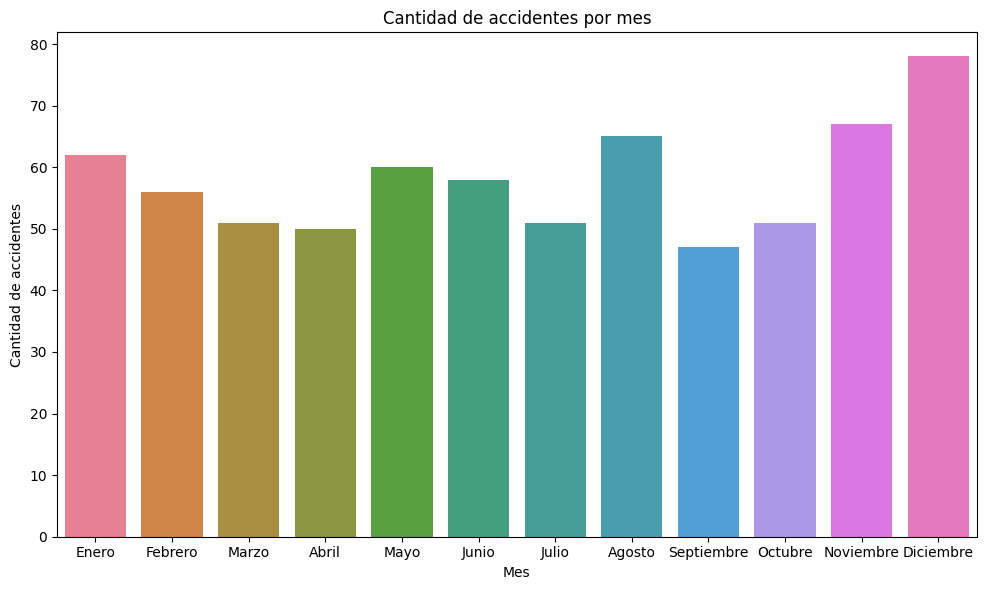

In [450]:
# Conteo de accidentes por mes
df_facts['mes'] = df_facts['fecha'].dt.month_name('spanish')
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='mes', hue='mes')
plt.title('Cantidad de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.tight_layout()
plt.show()

En este gráfico podemos observar con más detalle los meses con más accidentes, y ratifica la conclusión anterior respecto a los accidentes en las fechas de las fiestas de fin de año.

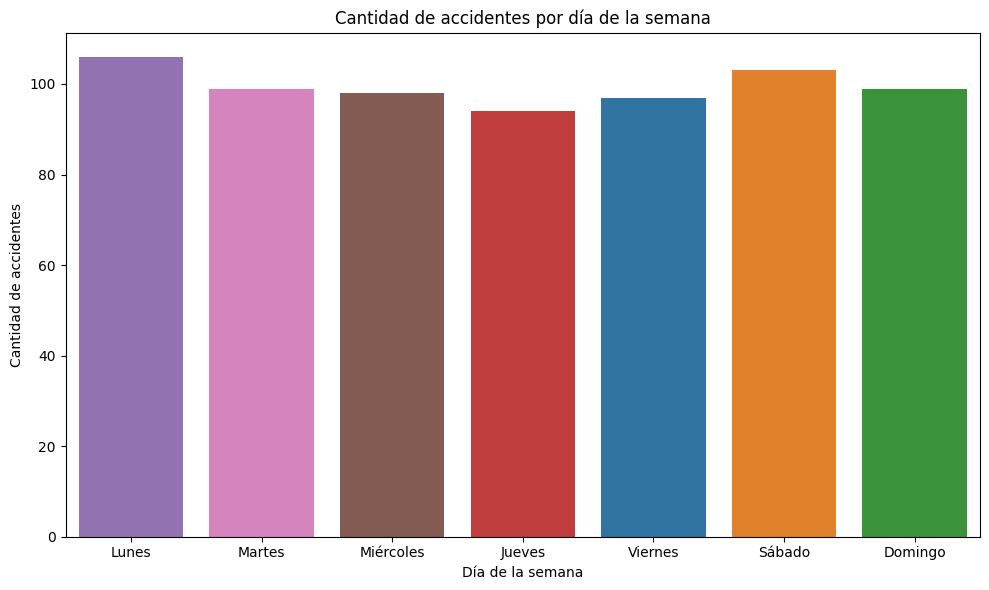

In [451]:
# Conteo de accidentes por día de la semana
df_facts['dia_semana'] = df_facts['fecha'].dt.day_name('spanish')
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='dia_semana', hue='dia_semana', order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Cantidad de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.tight_layout()
plt.show()

Los datos de este gráfico se ven bien distribuidos y no parece que valga la pena ninguna observación.

#### Variables espaciales

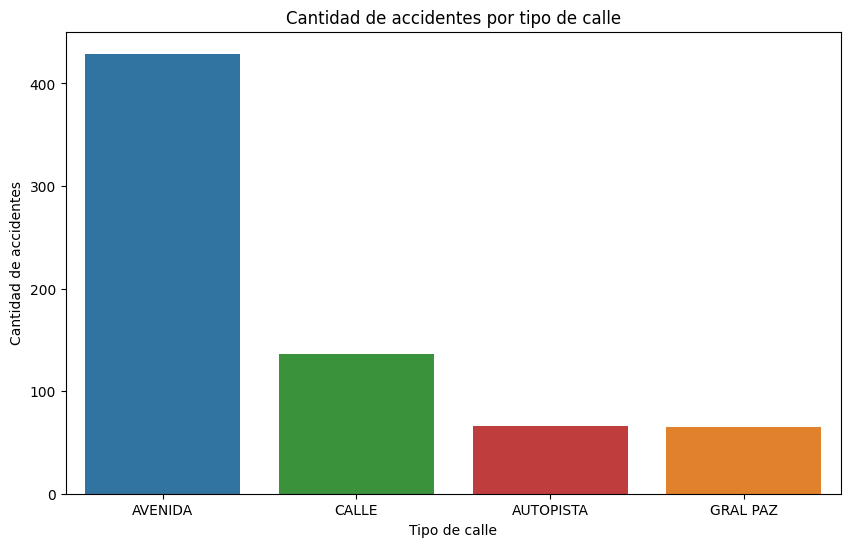

In [452]:
# Conteo de accidentes por tipo de calle
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='tipo_de_calle', hue='tipo_de_calle', order=df_facts['tipo_de_calle'].value_counts().index)
plt.title('Cantidad de accidentes por tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.show()

Descubrimos una irregularidad en los datos ya que la Avenida General Paz es considerada una autopista (pese a su nombre, no es una avenida), por lo que vamos a transformar estos valores y revisar nuevamente el gráfico.

In [453]:
df_facts['tipo_de_calle'] = df_facts['tipo_de_calle'].replace('GRAL PAZ', 'AUTOPISTA')

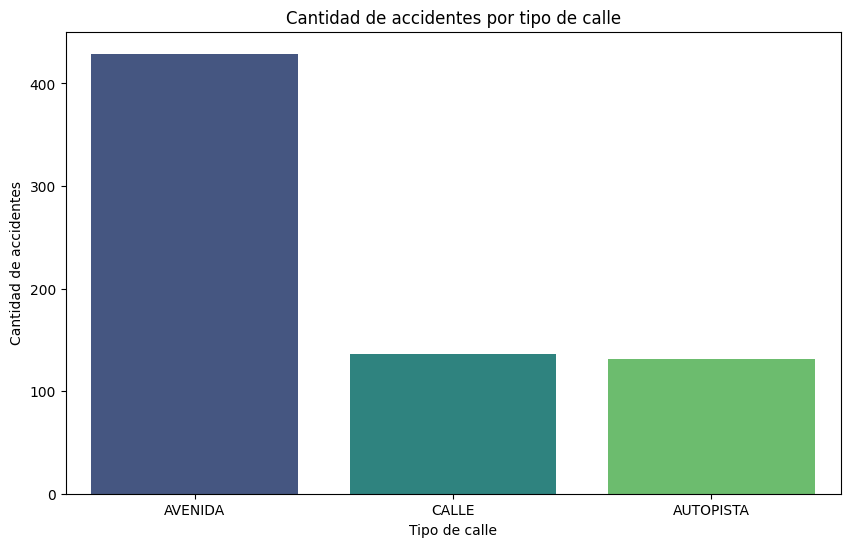

In [454]:
# Hacemos el gráfico nuevamente
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='tipo_de_calle', order=df_facts['tipo_de_calle'].value_counts().index, palette='viridis')
plt.title('Cantidad de accidentes por tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.show()

Este conteo nos indica que el mayor número de accidentes se da en las avenidas. Es un tema que necesita un poco más de profundidad y la idea es abordarlo más adelante en el análisis bivariado. También es una métrica interesante para desarrollar como KPI.

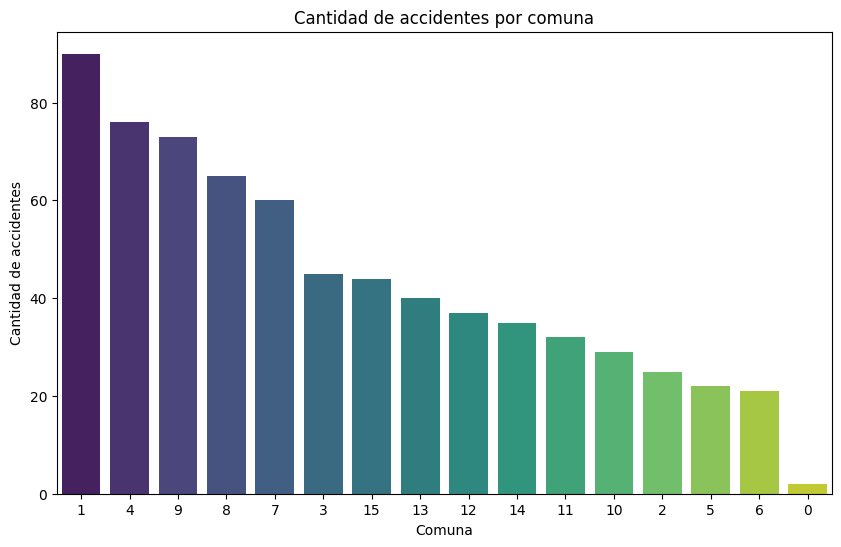

In [455]:
# Conteo de accidentes por comuna
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='comuna', order=df_facts['comuna'].value_counts().index, palette='viridis')
plt.title('Cantidad de accidentes por comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de accidentes')
plt.show()

Observamos que algunos valores corresponden a la comuna 0 la cual no existe. Procedemos a un análisis para descubrir la raíz del error.

In [456]:
mask = df_facts['comuna'] == 0
df_facts[mask]

,id,nro_victimas,fecha,hora,hh,lugar_del_hecho,tipo_de_calle,comuna,x,y,victima,acusado,mes,dia_semana
119,2016-0151,1,2016-11-18,20:35:00,20,SD,CALLE,0,NaN,NaN,PEATON,SD,Noviembre,Viernes
139,2016-0174,1,2016-12-27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,0,NaN,NaN,SD,SD,Diciembre,Martes


Vamos a borrar estos registros debido al alto contenido de valores faltantes y procedemos a crear el gráfico nuevamente.

In [457]:
# Borramos las filas que tengan comuna 0
df_facts = df_facts[~mask]

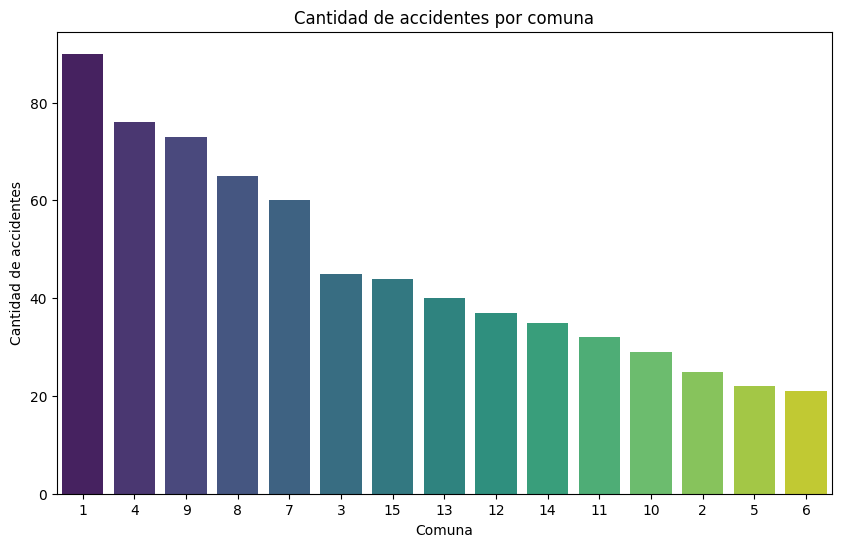

In [458]:
# Conteo de accidentes por comuna
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='comuna', order=df_facts['comuna'].value_counts().index, palette='viridis')
plt.title('Cantidad de accidentes por comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de accidentes')
plt.show()

Podemos observar que hay disparidad en los datos, pero prefiero enfocar el análisis de los patrones espaciales en otras variables como el tipo de calle y las coordenadas.

In [459]:
import folium
from folium.plugins import HeatMap

df_map = df_facts.dropna(subset=['x', 'y'])

# Mapa de calor por coordenadas del accidente.
heat_data = [[row['y'], row['x']] for index, row in df_map.iterrows()]
mapa = folium.Map(location=[-34.6083, -58.3712], zoom_start=12)
HeatMap(heat_data).add_to(mapa)
mapa.save('heatmap.html')
mapa


Este mapa de calor indica una mayor concentración en el sector sur-este de CABA, algo que, entre tantas cosas, se puede asociar a la cercanía con el puerto que provoca un volumen de tráfico más elevado.

#### Variables categóricas

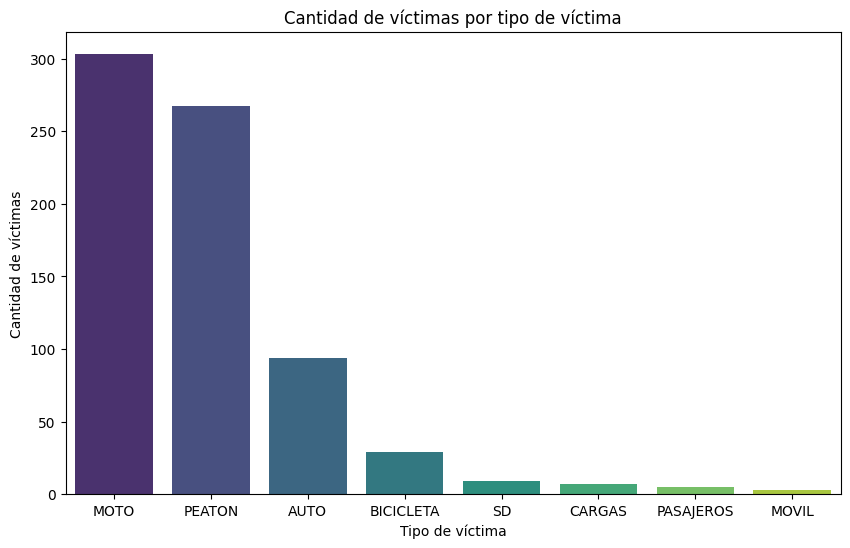

In [460]:
# Conteo de víctimas por tipo de víctima
plt.figure(figsize=(10,6))
sns.countplot(data=df_victims, x='victima', order=df_victims['victima'].value_counts().index, palette='viridis')
plt.title('Cantidad de víctimas por tipo de víctima')
plt.xlabel('Tipo de víctima')
plt.ylabel('Cantidad de víctimas')
plt.show()

Como vemos en este gráfico, los grupos más afectados son las motos y los peatones.
En ambos casos se asocia a una muy baja probabilidad de sobrevivir a un accidente, debido al alto riesgo y exposición al que se someten.

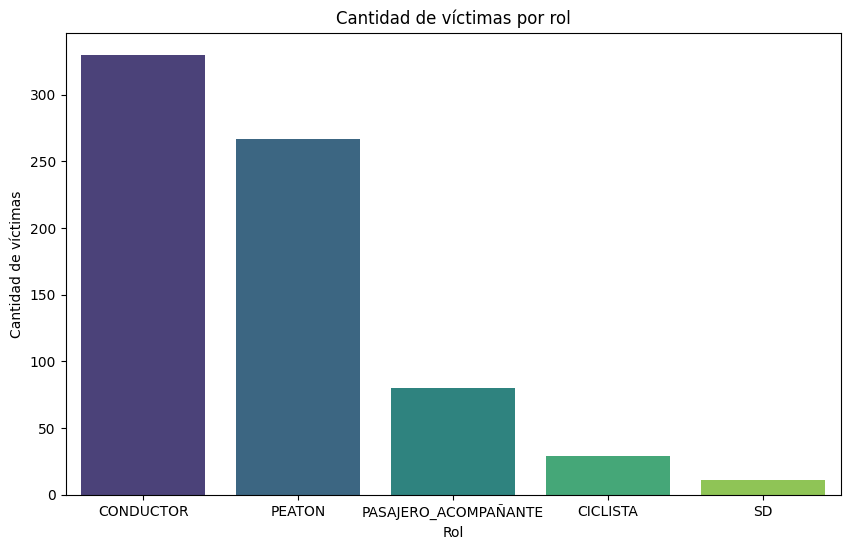

In [461]:
# Conteo de víctimas por rol
plt.figure(figsize=(10,6))
sns.countplot(data=df_victims, x='rol', order=df_victims['rol'].value_counts().index, palette='viridis')
plt.title('Cantidad de víctimas por rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad de víctimas')
plt.show()

Vemos que tanto conductores como peatones son los más afectados. En el caso del conductor se puede asociar al alto número de accidentes fatales en moto, por ejemplo. También al desuso de los cinturones de seguridad al viajar solos en auto.

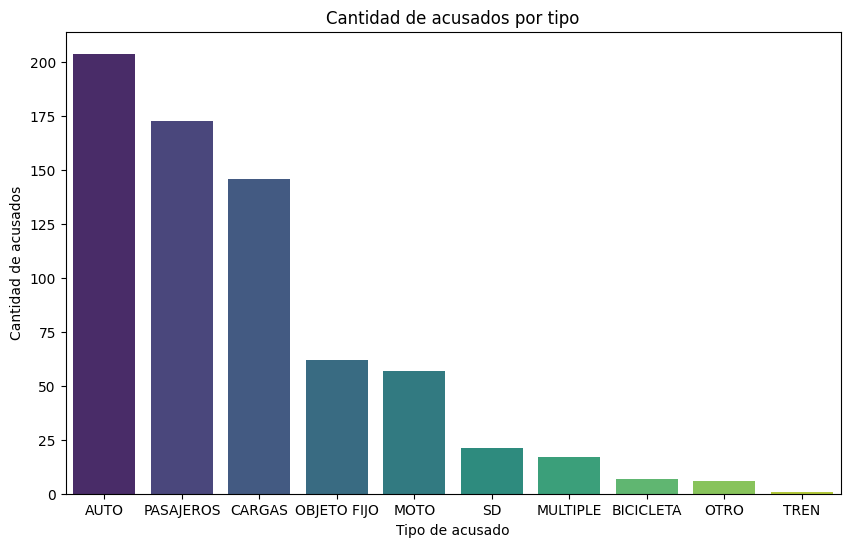

In [462]:
# Cantidad de acusados por tipo.
plt.figure(figsize=(10,6))
sns.countplot(data=df_facts, x='acusado', order=df_facts['acusado'].value_counts().index, palette='viridis')
plt.title('Cantidad de acusados por tipo')
plt.xlabel('Tipo de acusado')
plt.ylabel('Cantidad de acusados')
plt.show()

Vemos que los posibles culpables de los accidentes, en mayor medida, son los autos, los transportes de pasajeros, y el transporte de cargas.

Esto se puede asociar a la gran presencia de este tipo de transportes en la vía publica y por lo tanto a su exposición al riesgo de accidentes.

### Conclusiones hasta aquí:

Vamos a pasar al análisis bivariado y modificar el listado de métricas que nos interesan para desarrollar como KPIs:

- Reducir la cantidad de accidentes fatales en las avenidas.
- Reducir la cantidad de accidentes fatales en peatones.

### <p align=center>Análisis Bivariado</p>

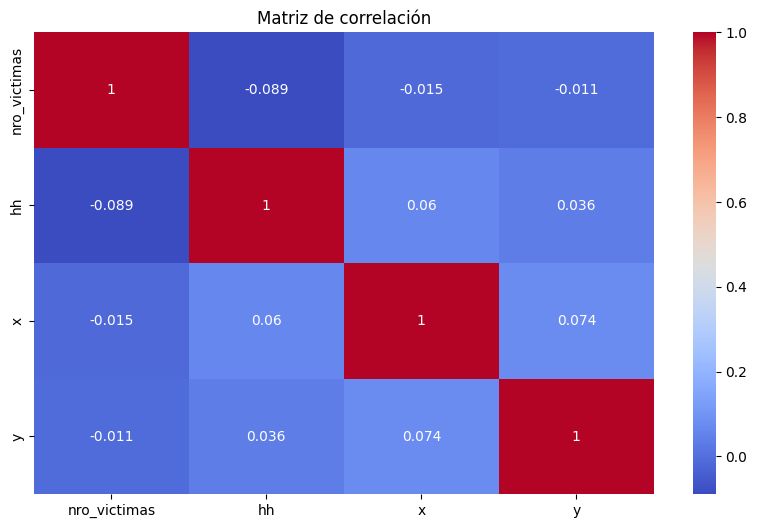

In [463]:
# Matriz de correlación para las variables numéricas

corr_matrix = df_facts[['nro_victimas', 'hh', 'x', 'y']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Observamos que no hay correlaciones lineales entre las variables numéricas.

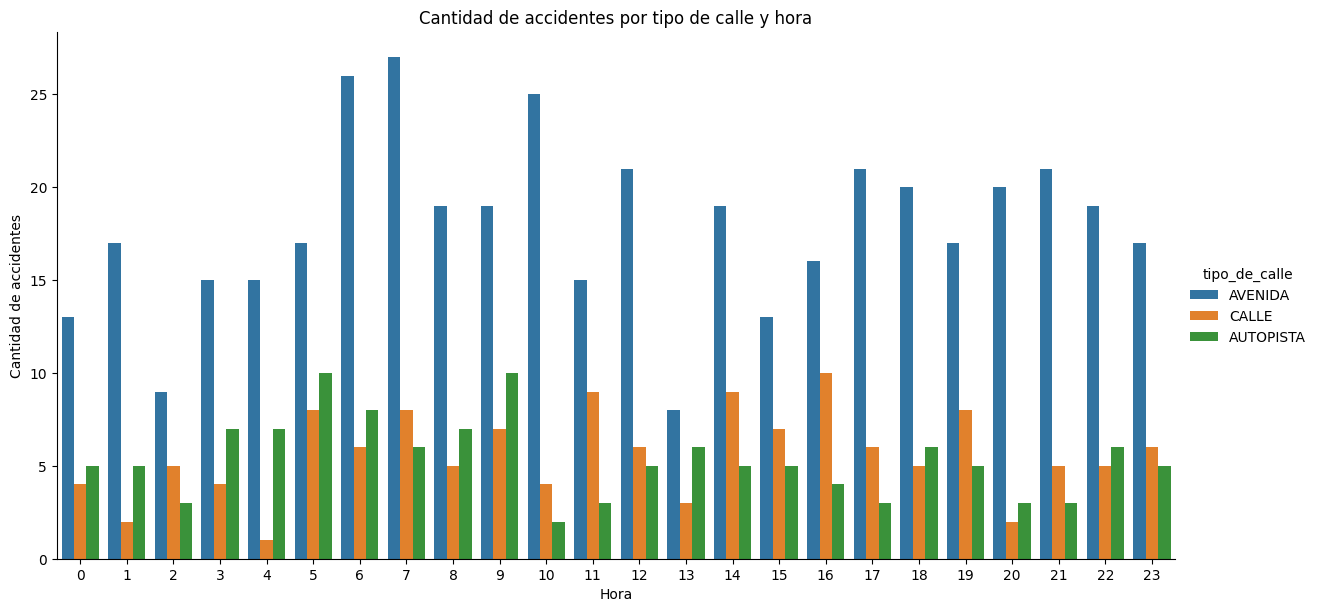

In [464]:
# Catplot de conteo de accidentes por tipo de calle y hora

# df_facts['hora'] = df_facts['hora'].astype(float)

sns.catplot(data=df_facts, x='hh', hue='tipo_de_calle', kind='count', height=6, aspect=2)
plt.title('Cantidad de accidentes por tipo de calle y hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de accidentes')
plt.show()

Podemos ver que en las avenidas se cumple el patrón identificado en los gráficos de accidentes por hora.

Esto quiere decir que para reducir el número de accidentes en las avenidas podemos dar un pequeño enfoque a las primeras horas del día donde más volumen de tráfico hay, y por lo tanto más accidentes.

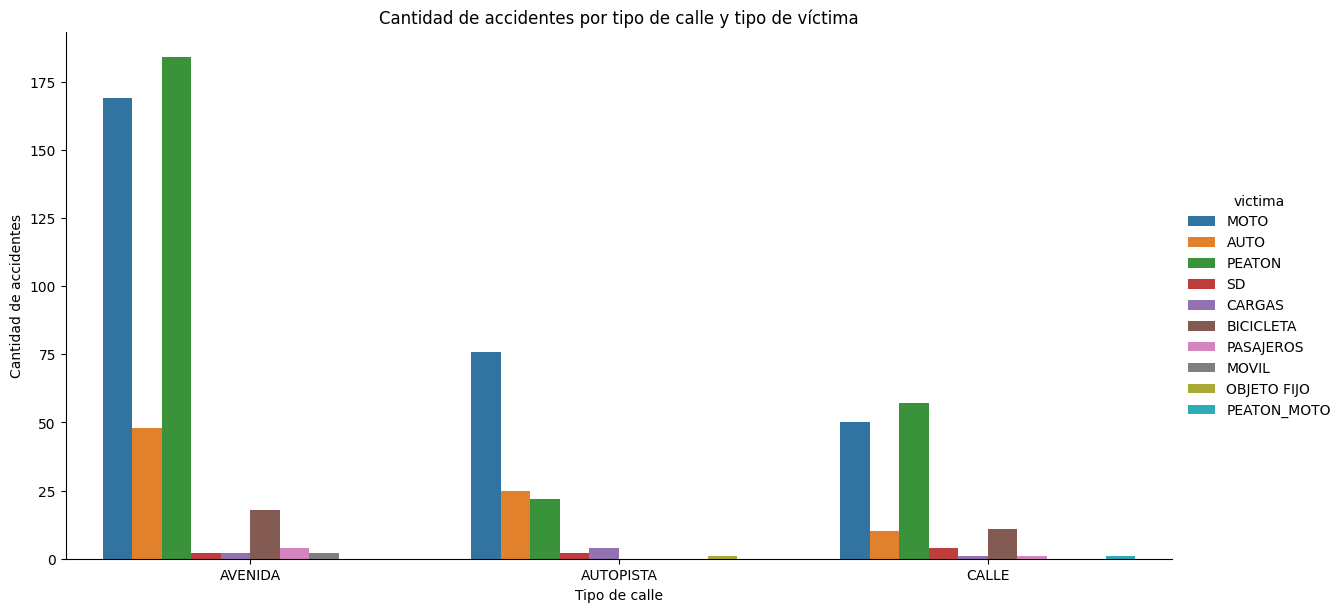

In [465]:
# Catplot de conteo de accidentes por tipo de calle y tipo de victima

sns.catplot(data=df_facts, x='tipo_de_calle', hue='victima', kind='count', height=6, aspect=2)
plt.title('Cantidad de accidentes por tipo de calle y tipo de víctima')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.show()

En este gráfico podemos confirmar también que el mayor número de víctimas de los accidentes se da en motos y peatones, incluso en el caso de las avenidas.

Se observa un número sorprendentemente elevado de peatones involucrados en accidentes en autopistas.

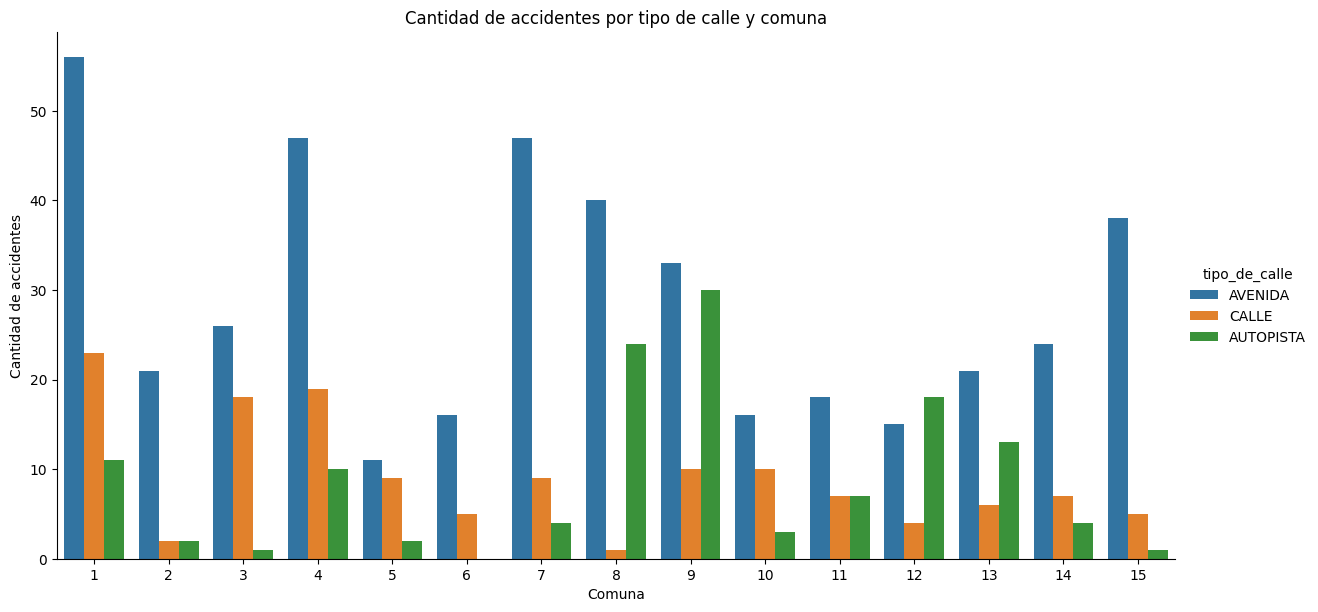

In [466]:
# Catplot de conteo de accidentes por comuna y tipo de calle
sns.catplot(data=df_facts, x='comuna', hue='tipo_de_calle', kind='count', height=6, aspect=2)
plt.title('Cantidad de accidentes por tipo de calle y comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de accidentes')
plt.show()

Observamos un gran número de accidentes en autopista en la comuna 8 y 9, lo cual se puede asociar seguramente a un mayor número y volumen de las mismas en estas comunas.

Por otra parte en todas las comunas la mayoría de accidentes son de avenidas, confirmando y reforzando que esta problemática debe ser abordada de manera general, teniendo en cuenta los insights previstos.

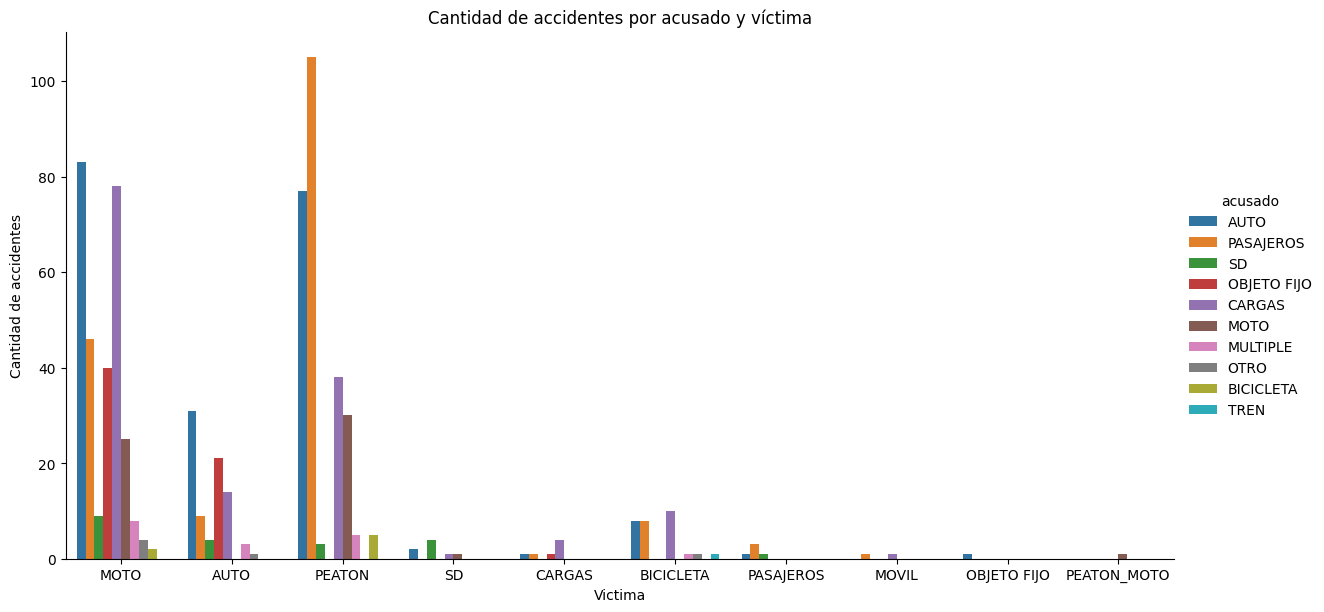

In [467]:
# Catplot de conteo de accidentes por víctima y acusado
sns.catplot(data=df_facts, x='victima', hue='acusado', kind='count', height=6, aspect=2)
plt.title('Cantidad de accidentes por acusado y víctima')
plt.xlabel('Victima')
plt.ylabel('Cantidad de accidentes')
plt.show()

Podemos observar que, en el caso de las motos, la mayoría de los accidentes son contra autos y vehículos de cargas, por lo que podemos enfocarnos en esto a la hora de desarrollar este KPI.

Respecto a los peatones, la mayoría se da con transporte de pasajeros, con autos en segundo orden, por lo que también podemos poner el foco ahí para las diferentes propuestas en pos de reducir este número de víctimas.

## Conclusiones:

**Primer KPI:**

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Propuestas posibles:
- Reforzar campañas de concientización para el género masculino.
- Reforzar controles y multas por negligencias en horarios laborales.
- Reforzar campañas de concientización y aumentar medidas de seguridad en jóvenes de 20 a 30 años.

**Segundo KPI:**

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Propuestas posibles:
- Campañas de concientización para conductores de autos y vehículos de cargas respecto a la circulación de motociclistas.
- Reforzar las campañas de concientización para motociclistas, con el uso de casco y el exceso de velocidad como temas centrales.
- Reducir los límites de velocidad para motos.

**Tercer KPI:**

Reducir en un 10% la cantidad de víctimas de accidentes en avenidas del último año, en CABA, respecto al año anterior.

Razón: el número de accidentes en las avenidas es demasiado elevado en comparacion con los otros tipos de calle.

Propuestas posibles:
- Mejora de la infraestructura: más semaforos y medidas de seguridad en las avenidas.
- Mayores controles en el inicio y final de la jornada laboral.
- Campañas de concientización respecto al peligro que estas representan hoy en día.

In [473]:
# Exportamos los datos utilizados en el análisis a un archivo excel.
df_facts.to_excel('../Dataset/hechos_eda.xlsx', index=False)
df_victims.to_excel('../Dataset/victimas_eda.xlsx', index=False)